# Ettoday 網路爬蟲實作練習

能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構

# 作業目標

根據範例：

取出今天所有的新聞

取出現在時間兩小時內的新聞

根據範例，取出三天前下午三點到五點的新聞

# 1. 取出今天所有的新聞

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup


browser = webdriver.Chrome('./chromedriver')
browser.get('https://www.ettoday.net/news/news-list.htm')

In [2]:
from selenium.webdriver.support.ui import Select

from datetime import date
datestr = date.today().strftime('%Y%m%d')
year = datestr[:4]
month = datestr[4:6]
day = datestr[6:]


select_Year = Select(browser.find_element_by_id('selY'))
select_Year.select_by_value(year)

select_Month = Select(browser.find_element_by_id('selM'))
select_Month.select_by_value(month)

select_Day = Select(browser.find_element_by_id('selD'))
select_Day.select_by_value(day)

browser.find_element_by_id('button').click()

import time
for i in range(50):
    browser.execute_script('window.scrollTo(0,100000)')
    time.sleep(1)

html = browser.page_source
html = BeautifulSoup(html , 'html.parser')
html

<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=3&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list.htm" type="text/javascript"></script><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list.htm" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl_fy2019.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2019121002.js"></script><script async="" src="https://onead.onevision.com.tw/external.php?c

In [14]:
tag = html.find('div' , class_ = 'part_list_2').find_all('h3')

import time

for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == int(year)) & (date_p[1] == int(month)) & (date_p[2] == int(day)):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')
        print('blah')

2019/12/26 13:29 「影劇」 吳建豪《葉問4》扮「隱藏版英雄」　赴美親受歧視：該出口氣要出！　
blah
2019/12/26 13:28 「消費」 【廣編】九和汽車「JAGUAR LAND ROVER 」20週年慶祝活動
blah
2019/12/26 13:27 「生活」 調節免疫力、呼吸道…紫錐花萃取物抗病毒　專家試驗：可成保健食品
blah
2019/12/26 13:27 「論壇」 【名家看經濟】李沃牆／中日韓FTA簽署　台灣不能只靠短期轉單效益
blah
2019/12/26 13:26 「房產雲」 花8600萬買別墅　她交屋前突襲檢查…一看牆壁發霉傻了
blah
2019/12/26 13:24 「影劇」 台版《鬼怪》真要拍？　「網傳男主角」言承旭回應了
blah
2019/12/26 13:24 「時尚」 IG爆紅！2020快染上「雲雀棕髮色」，化身時髦外國人風
blah
2019/12/26 13:23 「生活」 巧克力、蕾絲邊和紅底高跟鞋，風靡世界的法式品味
blah
2019/12/26 13:20 「政治」 趙少康爆氣！怒嗆蔡英文：有骨氣不要賺大陸錢　去跟川普講啊
blah
2019/12/26 13:20 「社會」 門鎖打不開！　高雄男學蜘蛛人爬出窗外卻卡住　警消驚險救出
blah
2019/12/26 13:19 「政治」 聖誕節沒放假都是「他」害的！　趙少康怒拍桌：年輕人應該生氣…網揭真正原因
blah
2019/12/26 13:14 「政治」 反滲透法是「綠色恐怖」？　林飛帆：僅白狼、邱毅、吳斯懷3種人需要擔心
blah
2019/12/26 13:14 「房產雲」 學區搭上文創　總太推案超走心
blah
2019/12/26 13:13 「政治」 「拒絕賄選、檢調硬起來」　吳志揚拜會檢調提供「賄選情資」
blah
2019/12/26 13:13 「保險」 搶退休市場！壽險業攜手「銀行+投信」合推投資型保險專案　外幣資產配置規劃退休金
blah
2019/12/26 13:13 「論壇」 【2020大選】趙春山／議兩岸政策，予豈好辯哉？
blah
2019/12/26 13:10 「社會」 前苗栗縣長劉政鴻胞弟劉政池　陽明山違法蓋七七行館今發監執行
blah
2019/12/26 13:10 「政治」 洪孟楷前進國會

# 取出今天下午三點到五點的新聞¶


In [20]:
for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == int(year)) & (date_p[1] == int(month)) & (date_p[2] == int(day)) & ((date_p[3] == 15) or (date_p[3] == 16) or (date_p[3] == 17)):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')

# 根據範例，取出三天前下午三點到五點的新聞¶


<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=3&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list-2019-12-26-0.htm" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list-2019-12-26-0.htm" type="text/javascript"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.ne
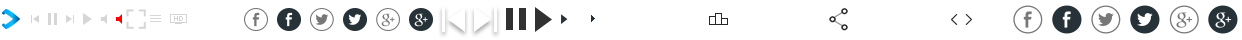
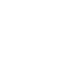
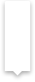
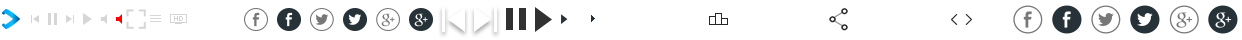

In [33]:
from selenium.webdriver.support.ui import Select

from datetime import date, timedelta
import datetime

datestr = (date.today() + timedelta(days= -3)).strftime('%Y%m%d')
year = datestr[:4]
month = datestr[4:6]
day = datestr[6:]


select_Year = Select(browser.find_element_by_id('selY'))
select_Year.select_by_value(year)

select_Month = Select(browser.find_element_by_id('selM'))
select_Month.select_by_value(month)

select_Day = Select(browser.find_element_by_id('selD'))
select_Day.select_by_value(day)

browser.find_element_by_id('button').click()

import time
for i in range(50):
    browser.execute_script('window.scrollTo(0,100000)')
    time.sleep(1)

html = browser.page_source
html = BeautifulSoup(html , 'html.parser')
html

In [37]:
tag = html.find('div' , class_ = 'part_list_2').find_all('h3')

import time

for i in tag:
    date_p = time.strptime(i.find('span').text , '%Y/%m/%d %H:%M') 
    if (date_p[0] == int(year)) & (date_p[1] == int(month)) & (date_p[2] == int(day)) & ((date_p[3] == 15) or (date_p[3] == 16) or (date_p[3] == 17)):
        date = i.find('span').text
        class_ = i.find('em').text
        title = i.find('a').text
        print(f'{date} 「{class_}」 {title}')

2019/12/23 17:59 「寵物動物」 聖誕版《瑪爾濟斯之歌》！全新MV＋洗腦歌詞笑爛網友：會背了啦
2019/12/23 17:58 「政治」 民眾黨新竹縣候選人林碩彥　「四大政見」要竹科榮耀再現
2019/12/23 17:58 「體育」 湖人再戰快艇前「詹皇AD都爆傷情」　魔獸看聖誕大戰：冠軍是6月產生
2019/12/23 17:58 「寵物動物」 「我收到魚鉤⋯」！海洋生物聖誕交換禮物　藏人類垃圾殘害真相
2019/12/23 17:57 「旅遊」 商業周刊／讓千人小村躍上國際的奢華菜單　西班牙味蕾再發現
2019/12/23 17:56 「社會」 逼韓星宋讚養拍性愛片　台經紀人涉一人分飾多角詐騙...裁准10萬交保
2019/12/23 17:56 「國際」 變態機師自稱主人　「拔頭髮要妻咬碎吞下」虐到精神崩潰…再逼拿刀殺掉2歲兒！
2019/12/23 17:54 「生活」 商業周刊／連人資都沒好感　績效制為何它還存在？
2019/12/23 17:54 「社會」 台北元旦再加2處科技執法！辛亥隧道區間測速　市民高架抓路肩和大貨車
2019/12/23 17:53 「政治」 吳達偉曝早7晚7行程…進化超暴走達偉！羅致政揪老婆玩音樂　拜票超人氣
2019/12/23 17:52 「財經」 商業周刊／錢櫃牛肉麵廠賣寶寶粥　靠媽媽大隊5年營收翻倍
2019/12/23 17:52 「旅遊」 日本鄉下住一晚！「銀杏之宿」旁神社鋪成黃金毯　隔天海釣超有趣
2019/12/23 17:52 「寵物動物」 出門散步沒帶牠們！3幼汪「躲樓梯偷看」　同步哀怨萌暈網友
2019/12/23 17:52 「保險」 邀同仁冬至送暖失依兒少！全球人壽捐助20萬元教育金給忠義基金會
2019/12/23 17:48 「生活」 一張圖看明年2月起酷航台灣大增班　天天飛首爾、新加坡一天4-5班
2019/12/23 17:48 「財經」 11月新增房貸利率微增　央行：每月承做對向不同利率僅小幅波動
2019/12/23 17:48 「論壇」 黃奎博／你要選擇民進黨賣的「未來夢想」，還是國民黨的「殘酷現實」？
2019/12/23 17:46 「政治」 雪隧大塞車用路人的痛　陳歐珀：提速及「高鐵延伸宜蘭」可解決
2019/12/23 17:46 「政治」 比網路聲量！「罷韓遊行